### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
np.random.seed(0)


In [2]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, accuracy_score
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestNeighbors
from sklearn.naive_bayes import MultinomialNB
from scipy import stats
from sklearn.metrics import balanced_accuracy_score
from sklearn.neighbors import NearestNeighbors
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from scipy import stats
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score
from sklearn.impute import SimpleImputer
from time import time as tt

In [3]:
%%capture
# we use %%capture to suppress the output. Comment the line above if you're working on local machine
# install spacy
!pip install --upgrade spacy
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_md
#!python -m spacy download en_core_web_lg
!pip install clean-text



In [4]:
import spacy
from cleantext import clean

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


# Data

In [5]:
data=pd.read_csv('dataset.csv')

In [6]:
data.head()

,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
0,428209002237,Ramsay was born in Glasgow on 2 October 1852. ...,ORG_YES_PRODUCT_NO_PERSON_YES_,49.0,12.0,man,biographies,clear_enough
1,564218010072,It has been widely estimated for at least the ...,ORG_YES_PRODUCT_NO_PERSON_NO_,166.0,47.0,man,artificial intelligence,not_clear_enough
2,291401001672,He went on to win the Royal Medal of the Royal...,ORG_YES_PRODUCT_NO_PERSON_NO_,69.0,18.0,non-binary,biographies,clear_enough
3,31548004883,The changes have altered many underlying assum...,ORG_NO_PRODUCT_YES_PERSON_NO_,76.0,27.0,non-binary,programming,clear_enough
4,50634005146,"After these novels were published, Disraeli de...",ORG_YES_PRODUCT_YES_PERSON_YES_,200.0,47.0,man,biographies,not_clear_enough


# EDA

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.shape

(9132, 8)

In [9]:
# list of column titles
data.columns

Index(['par_id', 'paragraph', 'has_entity', 'lexicon_count', 'difficult_words',
       'last_editor_gender', 'category', 'text_clarity'],
      dtype='object')

In [10]:
data.dtypes

par_id                  int64
paragraph              object
has_entity             object
lexicon_count         float64
difficult_words       float64
last_editor_gender     object
category               object
text_clarity           object
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9132 entries, 0 to 9131
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   par_id              9132 non-null   int64  
 1   paragraph           9132 non-null   object 
 2   has_entity          9132 non-null   object 
 3   lexicon_count       9132 non-null   float64
 4   difficult_words     9132 non-null   float64
 5   last_editor_gender  9132 non-null   object 
 6   category            9132 non-null   object 
 7   text_clarity        9132 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 570.9+ KB


In [12]:
data.describe()

,par_id,lexicon_count,difficult_words
count,9.132000e+03,9132.000000,9132.000000
mean,3.571119e+11,82.039422,21.537698
std,3.220610e+11,63.456144,16.297682
min,8.500328e+07,0.000000,0.000000
25%,7.019601e+10,33.000000,9.000000
50%,2.684380e+11,64.000000,17.000000
75%,6.124310e+11,117.000000,30.000000
max,1.058779e+12,653.000000,143.000000


In [13]:
categorical_columns=['has_entity','last_editor_gender','category']
numerical_columns=['lexicon_count','difficult_words']

In [14]:
# get the categories and their count for each feature
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  print(data[col].value_counts())
  print()

Categories and number of occurrences for 'has_entity'
has_entity
ORG_YES_PRODUCT_NO_PERSON_YES_     3020
ORG_NO_PRODUCT_NO_PERSON_NO_       2793
ORG_YES_PRODUCT_NO_PERSON_NO_      1448
ORG_NO_PRODUCT_NO_PERSON_YES_      1349
ORG_YES_PRODUCT_YES_PERSON_YES_     292
ORG_YES_PRODUCT_YES_PERSON_NO_      124
ORG_NO_PRODUCT_YES_PERSON_YES_       64
ORG_NO_PRODUCT_YES_PERSON_NO_        42
Name: count, dtype: int64

Categories and number of occurrences for 'last_editor_gender'
last_editor_gender
man                  6103
woman                2412
non-binary            352
prefer_not_to_say     265
Name: count, dtype: int64

Categories and number of occurrences for 'category'
category
biographies                             2960
philosophy                              2524
programming                             1948
artificial intelligence                 1537
movies about artificial intelligence     163
Name: count, dtype: int64



Text(0.5, 1.0, 'histogram ')

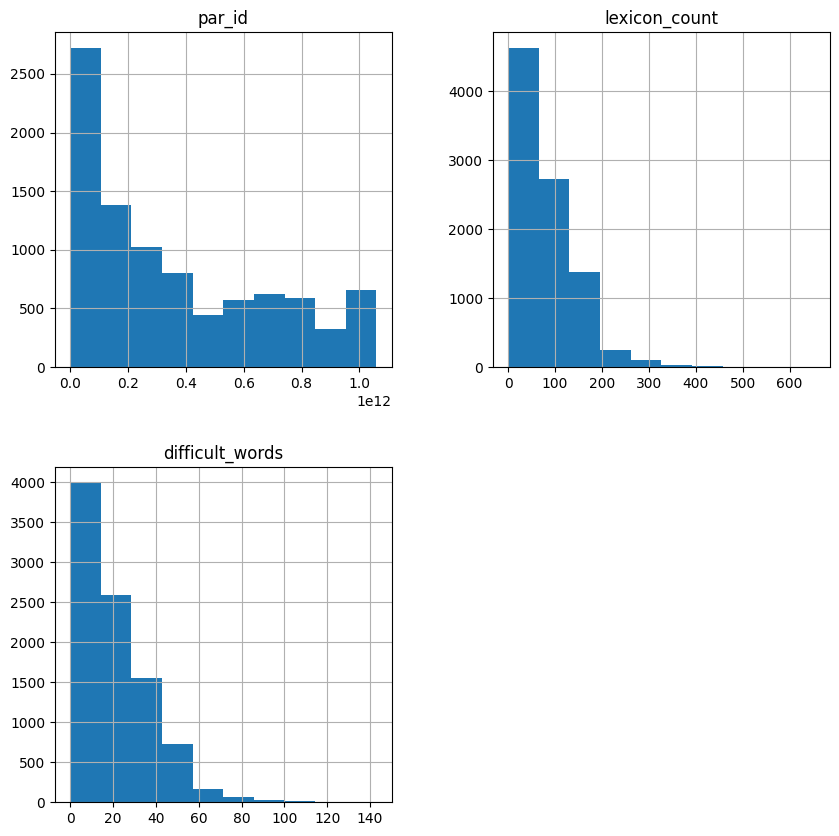

In [15]:
data.hist(figsize=(10,10))
plt.title('histogram ')

<AxesSubplot:>

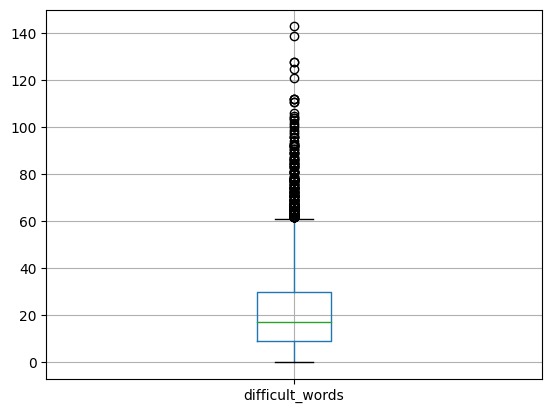

In [16]:
data.boxplot('difficult_words')

<AxesSubplot:>

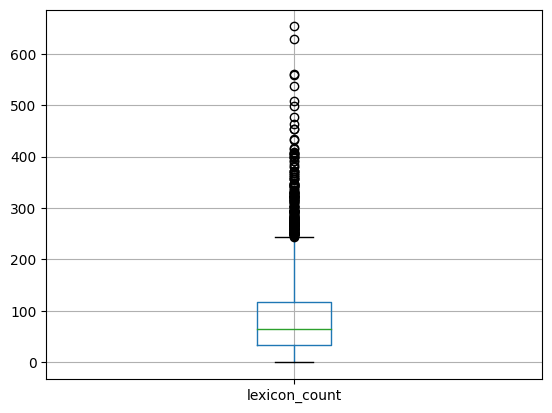

In [17]:
data.boxplot('lexicon_count')

<AxesSubplot:title={'center':'entity count '}, xlabel='has_entity', ylabel='count'>

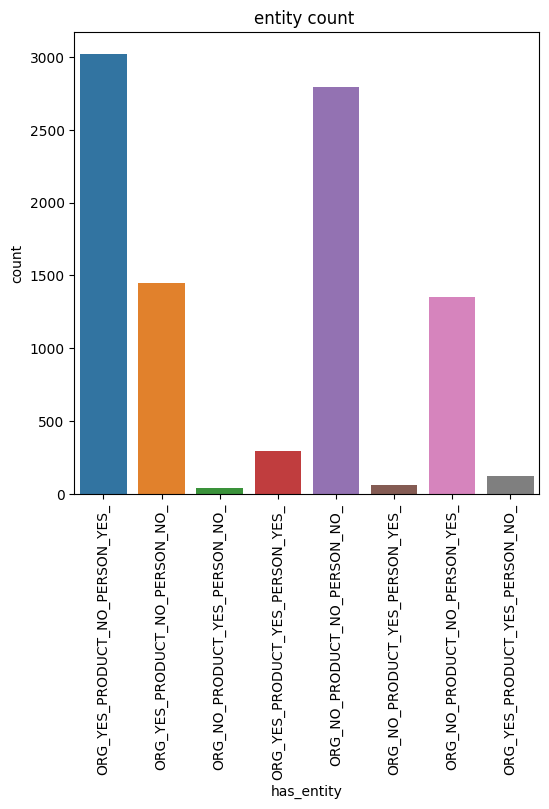

In [18]:
plt.figure(figsize = (6,6))
plt.xticks(rotation=90)
plt.title('entity count ')
sns.countplot(data=data,x="has_entity")

<AxesSubplot:title={'center':'editor count'}, xlabel='last_editor_gender', ylabel='count'>

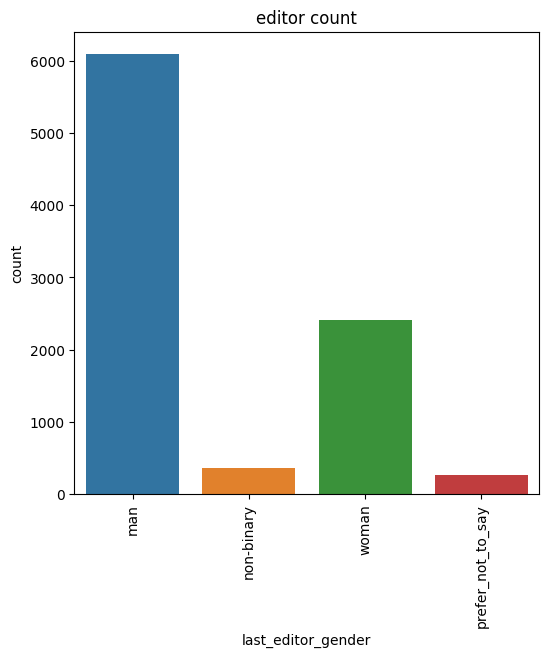

In [19]:
plt.figure(figsize = (6,6))
plt.xticks(rotation=90)
plt.title('editor count')
sns.countplot(data=data,x="last_editor_gender")

<AxesSubplot:title={'center':'category count'}, xlabel='category', ylabel='count'>

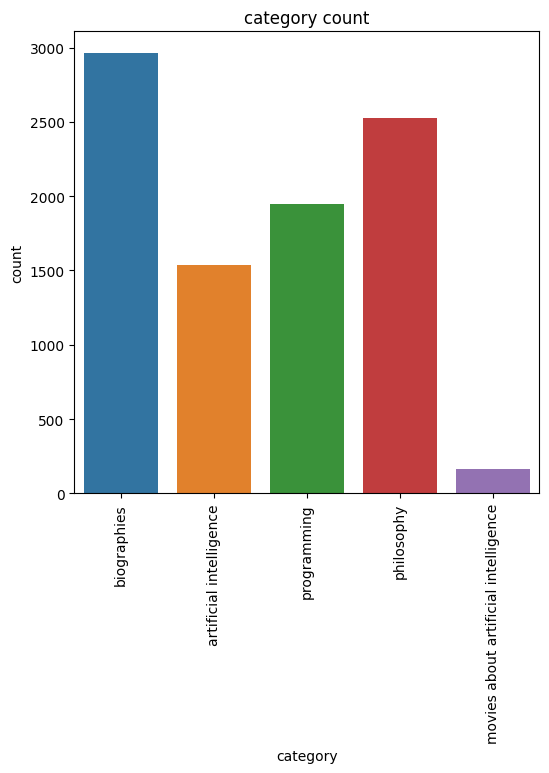

In [20]:
plt.figure(figsize = (6,6))
plt.xticks(rotation=90)
plt.title('category count')
sns.countplot(data=data,x="category")

In [21]:
print(f'Length of data: {len(data)}')

Length of data: 9132


In [22]:
print(f"Number of duplicates in the data: {data.duplicated().sum()}")

Number of duplicates in the data: 0


In [23]:
data.category.value_counts()

category
biographies                             2960
philosophy                              2524
programming                             1948
artificial intelligence                 1537
movies about artificial intelligence     163
Name: count, dtype: int64

In [24]:
data.has_entity.value_counts()

has_entity
ORG_YES_PRODUCT_NO_PERSON_YES_     3020
ORG_NO_PRODUCT_NO_PERSON_NO_       2793
ORG_YES_PRODUCT_NO_PERSON_NO_      1448
ORG_NO_PRODUCT_NO_PERSON_YES_      1349
ORG_YES_PRODUCT_YES_PERSON_YES_     292
ORG_YES_PRODUCT_YES_PERSON_NO_      124
ORG_NO_PRODUCT_YES_PERSON_YES_       64
ORG_NO_PRODUCT_YES_PERSON_NO_        42
Name: count, dtype: int64

In [25]:
# missing values
print(data.isna().sum())

par_id                0
paragraph             0
has_entity            0
lexicon_count         0
difficult_words       0
last_editor_gender    0
category              0
text_clarity          0
dtype: int64


In [26]:
print('Category names are:')
Categories =['artificial intelligence','biographies','movies about artificial intelligence','philosophy','programming']

print(Categories)
print()
print('Category names and corresponding labels are:')
print([(v, k) for k, v in enumerate(Categories)])

Category names are:
['artificial intelligence', 'biographies', 'movies about artificial intelligence', 'philosophy', 'programming']

Category names and corresponding labels are:
[('artificial intelligence', 0), ('biographies', 1), ('movies about artificial intelligence', 2), ('philosophy', 3), ('programming', 4)]


## Data Cleaning

In [27]:
data.has_entity.value_counts()

has_entity
ORG_YES_PRODUCT_NO_PERSON_YES_     3020
ORG_NO_PRODUCT_NO_PERSON_NO_       2793
ORG_YES_PRODUCT_NO_PERSON_NO_      1448
ORG_NO_PRODUCT_NO_PERSON_YES_      1349
ORG_YES_PRODUCT_YES_PERSON_YES_     292
ORG_YES_PRODUCT_YES_PERSON_NO_      124
ORG_NO_PRODUCT_YES_PERSON_YES_       64
ORG_NO_PRODUCT_YES_PERSON_NO_        42
Name: count, dtype: int64

In [28]:
# replacing data missing value into nall value
data.loc[data.has_entity=='data missing','has_entity'] = np.nan

In [29]:
data.category.value_counts()

category
biographies                             2960
philosophy                              2524
programming                             1948
artificial intelligence                 1537
movies about artificial intelligence     163
Name: count, dtype: int64

In [30]:
# transform all the categories name into lower case
data.loc[data.category=='Artificial intelligence','category'] = 'artificial intelligence'
data.loc[data.category=='Philosophy','category'] = 'philosophy'
data.loc[data.category=='Biographies','category'] = 'biographies'
data.loc[data.category=='Programming','category'] = 'programming'
data.loc[data.category=='Movies about artificial intelligence','category'] = 'movies about artificial intelligence'

In [31]:
data.category.value_counts()

category
biographies                             2960
philosophy                              2524
programming                             1948
artificial intelligence                 1537
movies about artificial intelligence     163
Name: count, dtype: int64

### Filling in Missing Data 

In [32]:
# Imputation of numerical missing values
imptr_cat=SimpleImputer(missing_values=np.nan, strategy='mean')
imptr_cat=imptr_cat.fit(data[numerical_columns])
data[numerical_columns]=imptr_cat.transform(data[numerical_columns])
print(data.isnull().sum())

par_id                0
paragraph             0
has_entity            0
lexicon_count         0
difficult_words       0
last_editor_gender    0
category              0
text_clarity          0
dtype: int64


In [33]:
# Imputation of categorical missing values
imptr_cat=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imptr_cat=imptr_cat.fit(data[categorical_columns])
data[categorical_columns]=imptr_cat.transform(data[categorical_columns])
print(data.isnull().sum())

par_id                0
paragraph             0
has_entity            0
lexicon_count         0
difficult_words       0
last_editor_gender    0
category              0
text_clarity          0
dtype: int64


### Text pre-processing

#### Text cleaning

In [34]:
# Making a function for text cleaning

from cleantext import clean

def clean_text(x):
  return clean(x,
    fix_unicode=True,               
    lower=True,                     
    no_line_breaks=True,           
    no_punct=False,                 
    no_urls=True,                  
    replace_with_url="",          
    no_emails=True,                
    replace_with_email="",        
    no_phone_numbers=True,         
    replace_with_phone_number="",   
    lang="en"                       
    )

In [35]:
# Add a new column with the of paragraph after cleaning the text
data['clean_text']= data['paragraph'].apply(clean_text)

In [36]:
# Add a new column for the length of each text string
data['text_length'] = data['clean_text'].apply(len)

In [37]:
data.head(10)

,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity,clean_text,text_length
0,428209002237,Ramsay was born in Glasgow on 2 October 1852. ...,ORG_YES_PRODUCT_NO_PERSON_YES_,49.0,12.0,man,biographies,clear_enough,ramsay was born in glasgow on 2 october 1852. ...,283
1,564218010072,It has been widely estimated for at least the ...,ORG_YES_PRODUCT_NO_PERSON_NO_,166.0,47.0,man,artificial intelligence,not_clear_enough,it has been widely estimated for at least the ...,1037
2,291401001672,He went on to win the Royal Medal of the Royal...,ORG_YES_PRODUCT_NO_PERSON_NO_,69.0,18.0,non-binary,biographies,clear_enough,he went on to win the royal medal of the royal...,423
3,31548004883,The changes have altered many underlying assum...,ORG_NO_PRODUCT_YES_PERSON_NO_,76.0,27.0,non-binary,programming,clear_enough,the changes have altered many underlying assum...,514
4,50634005146,"After these novels were published, Disraeli de...",ORG_YES_PRODUCT_YES_PERSON_YES_,200.0,47.0,man,biographies,not_clear_enough,"after these novels were published, disraeli de...",1235
5,220520007895,Philo also proposes that the order in nature m...,ORG_NO_PRODUCT_NO_PERSON_NO_,137.0,36.0,man,philosophy,clear_enough,philo also proposes that the order in nature m...,798
6,6360003753,"This led to the AI spring of the early 2020s,...",ORG_YES_PRODUCT_NO_PERSON_NO_,116.0,47.0,man,artificial intelligence,not_clear_enough,"this led to the ai spring of the early 2020s, ...",886
7,848119011941,A second form of functionalism is based on the...,ORG_YES_PRODUCT_NO_PERSON_YES_,42.0,14.0,man,philosophy,clear_enough,a second form of functionalism is based on the...,277
8,49279000639,"The opposite of ""moral"" is ""immoral"", meaning ...",ORG_NO_PRODUCT_NO_PERSON_NO_,51.0,8.0,man,philosophy,clear_enough,"the opposite of ""moral"" is ""immoral"", meaning ...",275
9,79225005859,Pepys' diary provides a first-hand account of ...,ORG_NO_PRODUCT_YES_PERSON_YES_,139.0,31.0,man,biographies,not_clear_enough,pepys' diary provides a first-hand account of ...,856


In [38]:
# Duplicate
data.duplicated().sum()

0

In [39]:
# Removing duplicates

data=data.drop_duplicates()

In [40]:
data.duplicated().sum()

0

In [41]:
# missing values
print(data.isna().sum())

par_id                0
paragraph             0
has_entity            0
lexicon_count         0
difficult_words       0
last_editor_gender    0
category              0
text_clarity          0
clean_text            0
text_length           0
dtype: int64


# Identify Categories

#### Making a DataFrame for identifying the topic of paragraph  (task-1)

In [42]:
data_1=data[['clean_text','has_entity','text_length','category']].copy()

In [43]:
data_1.head()

,clean_text,has_entity,text_length,category
0,ramsay was born in glasgow on 2 october 1852. ...,ORG_YES_PRODUCT_NO_PERSON_YES_,283,biographies
1,it has been widely estimated for at least the ...,ORG_YES_PRODUCT_NO_PERSON_NO_,1037,artificial intelligence
2,he went on to win the royal medal of the royal...,ORG_YES_PRODUCT_NO_PERSON_NO_,423,biographies
3,the changes have altered many underlying assum...,ORG_NO_PRODUCT_YES_PERSON_NO_,514,programming
4,"after these novels were published, disraeli de...",ORG_YES_PRODUCT_YES_PERSON_YES_,1235,biographies


In [44]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9132 entries, 0 to 9131
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   clean_text   9132 non-null   object
 1   has_entity   9132 non-null   object
 2   text_length  9132 non-null   int64 
 3   category     9132 non-null   object
dtypes: int64(1), object(3)
memory usage: 285.5+ KB


In [45]:
print(data_1.duplicated().sum())

82


In [46]:
data_1=data_1.drop_duplicates()

In [47]:
print(data_1.duplicated().sum())

0


#### Data spliting

In [48]:
df_train, df_test = train_test_split(data_1, test_size=0.1,shuffle=True, stratify = data_1['category'], random_state=42)

In [49]:
df_train.category.value_counts()

category
biographies                             2639
philosophy                              2237
programming                             1746
artificial intelligence                 1376
movies about artificial intelligence     147
Name: count, dtype: int64

## Data Encoding

In [50]:
cat_columns=['has_entity','category']

In [51]:
# Encoding 'has_entity' and 'category' columns by LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
df_train[cat_columns] = df_train[cat_columns].apply(LabelEncoder().fit_transform)
df_test[cat_columns] = df_test[cat_columns].apply(LabelEncoder().fit_transform)

In [52]:
df_train.category.value_counts()

category
1    2639
3    2237
4    1746
0    1376
2     147
Name: count, dtype: int64

In [53]:
df_train.head()

,clean_text,has_entity,text_length,category
9125,"instead of console.writeline, one could use ms...",6,126,4
3615,the user of the term imagines a kind of indepe...,0,211,3
4620,"in the late 1950s, computer users and manufact...",5,805,4
1631,sir isaac newton's calculations changed the wa...,1,592,1
6376,the last of the guard retreated headlong. mass...,5,666,1


In [54]:
df_test.head()

,clean_text,has_entity,text_length,category
8681,"on february 56, 2017, tax preparation company ...",5,103,0
2814,"in 2020, attenborough narrated the documentary...",5,1197,1
324,"in a letter dated 16 september 1855, lister re...",1,537,1
2812,as the allied forces' invasion of france and t...,5,1088,1
6405,falun gong states that karma is the reason for...,5,1347,3


### Word embeddings

In [55]:

import string
EXTRA_PUNCT = string.punctuation

# import Spacy
import spacy

# create the Spacy pipeline
nlp = spacy.load('en_core_web_md')


import string
EXTRA_PUNCT = string.punctuation

# import Spacy
import spacy
# create the Spacy pipeline
nlp = spacy.load('en_core_web_md')


def get_spacy_doc_embedding(text_):

  doc_ = nlp(text_)
  return doc_.vector

def compute_avg_lemma_embedding(text_):
  doc_ = nlp(text_)

  avg_embedding = np.zeros_like(doc_.vector)
  token_counter = 0
  for token in doc_:
    if (token.is_stop or token.is_punct or token.is_digit or (token.lemma_ in EXTRA_PUNCT)):
      continue
    avg_embedding += token.vector
    token_counter+=1
  if token_counter>0:
    avg_embedding = avg_embedding/token_counter
  return avg_embedding


Now process the whole dataset and save the results in new columns.

Embedding train and test data

In [56]:
df_train_emb = df_train['clean_text'].apply(lambda x:  pd.Series(get_spacy_doc_embedding(x)))
df_train_new = df_train_emb.join(df_train[['text_length','has_entity','category']])
df_train_new.columns = df_train_new.columns.astype(str)

In [57]:
df_test_emb = df_test['clean_text'].apply(lambda x: pd.Series(get_spacy_doc_embedding(x)))
df_test_new = df_test_emb.join(df_test[['text_length','has_entity','category']])
df_test_new.columns = df_test_new.columns.astype(str)

In [58]:
df_train_new.head()

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,text_length,has_entity,category
9125,-0.670748,0.290235,-0.189945,-0.019850,-0.141127,0.080337,0.012824,-0.140082,-0.016086,1.665210,...,-0.011437,0.013525,0.064445,-0.016417,-0.103665,0.110901,0.030800,126,6,4
3615,-0.695268,0.205417,-0.259179,0.034135,-0.098458,0.037987,-0.001104,-0.020563,-0.007654,1.906741,...,-0.077476,-0.022502,0.138042,-0.033195,-0.203286,0.115289,-0.058914,211,0,3
4620,-0.705843,0.213760,-0.085618,-0.067243,-0.076052,0.003306,0.082253,-0.123562,0.005600,1.764510,...,0.093908,0.026881,0.079248,-0.005889,-0.100024,0.024630,-0.003843,805,5,4
1631,-0.704639,0.216701,-0.238429,-0.025054,-0.120784,0.038199,-0.000167,-0.025958,0.013460,2.001039,...,-0.023749,0.046199,0.154094,-0.015126,-0.077638,0.075152,-0.023861,592,1,1
6376,-0.693357,0.185459,-0.087093,0.005667,-0.007130,-0.059025,-0.032717,-0.006363,-0.049786,1.596800,...,-0.087653,-0.007325,0.109741,0.016264,-0.155463,0.026971,-0.038351,666,5,1


## ML model building

In [59]:
# Preparation
import warnings
warnings.simplefilter("ignore")
y_train = df_train_new['category']
y_test = df_test_new['category']

In [60]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8145 entries, 9125 to 1717
Columns: 303 entries, 0 to category
dtypes: float32(300), int32(2), int64(1)
memory usage: 9.8 MB


In [61]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 8145 entries, 9125 to 1717
Series name: category
Non-Null Count  Dtype
--------------  -----
8145 non-null   int32
dtypes: int32(1)
memory usage: 353.5 KB


In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ct = ColumnTransformer(
    transformers= [
        (
            "scaling",
            StandardScaler(),
            ["text_length"], 
        )
    ],
    remainder="passthrough",
    verbose_feature_names_out=False 
)

In [63]:
from sklearn.neural_network import MLPClassifier

# Create the pipeline
clf_ = Pipeline(
        steps =[('encoding', ct),
              ('clf', MLPClassifier()),
      ]
    )


In [64]:
# Set up the hyper-parameters to test
hparameters = {'clf__hidden_layer_sizes': ((20,20,),(30,)),
              'clf__learning_rate_init': [0.0001, 0.001],
             }


### CV search

In [65]:
# creating a function for GridSearch 
clf_search = GridSearchCV(clf_, hparameters, scoring= "accuracy", cv= 5,
                          return_train_score=True)


_ =clf_search.fit(df_train_new.drop(columns = ['category']), y_train)


In [66]:
print(clf_search.best_score_, clf_search.best_params_)

print()

0.8521792510742786 {'clf__hidden_layer_sizes': (30,), 'clf__learning_rate_init': 0.001}



### Evaluation

Now I will compare the results on the training and validation folds from the grid search.

In [67]:
cv_res = pd.DataFrame(clf_search.cv_results_)
interesting_columns = ['mean_test_score','std_test_score','mean_train_score','std_train_score']
interesting_columns = interesting_columns + [t for t in cv_res.columns if 'param_' in t]
cv_res[interesting_columns]

,mean_test_score,std_test_score,mean_train_score,std_train_score,param_clf__hidden_layer_sizes,param_clf__learning_rate_init
0,0.834009,0.009649,0.849662,0.003471,"(20, 20)",0.0001
1,0.848128,0.016226,0.934561,0.008759,"(20, 20)",0.001
2,0.831553,0.009094,0.843738,0.003022,"(30,)",0.0001
3,0.852179,0.013596,0.926581,0.005130,"(30,)",0.001


Here the results of training dataset and validation dataset are almost same. So there is no over/under-fitting problem.

In [68]:
# Find the best estimator
best_clf = clf_search.best_estimator_

                                      precision    recall  f1-score   support

             artificial intelligence       0.82      0.82      0.82       153
                         biographies       0.90      0.89      0.90       293
movies about artificial intelligence       0.94      0.94      0.94        16
                          philosophy       0.89      0.86      0.88       249
                         programming       0.89      0.93      0.91       194

                            accuracy                           0.88       905
                           macro avg       0.89      0.89      0.89       905
                        weighted avg       0.88      0.88      0.88       905



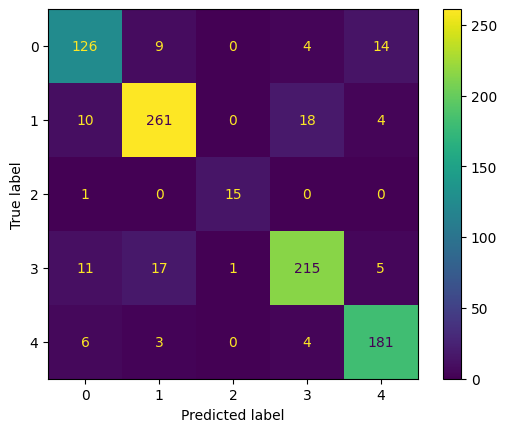

In [69]:
# Finding predictions and evaluation metrics by the best estimator
y_pred = best_clf.predict(df_test_new.drop(columns = ['category']))
print(classification_report(y_test, y_pred, target_names = Categories))

cm= ConfusionMatrixDisplay.from_estimator(best_clf, df_test_new.drop(columns = ['category']), y_test)



#### Comparison with trivial baseline

                                      precision    recall  f1-score   support

             artificial intelligence       0.15      0.19      0.17       153
                         biographies       0.31      0.17      0.22       293
movies about artificial intelligence       0.01      0.12      0.02        16
                          philosophy       0.27      0.18      0.22       249
                         programming       0.24      0.23      0.23       194

                            accuracy                           0.19       905
                           macro avg       0.20      0.18      0.17       905
                        weighted avg       0.25      0.19      0.21       905



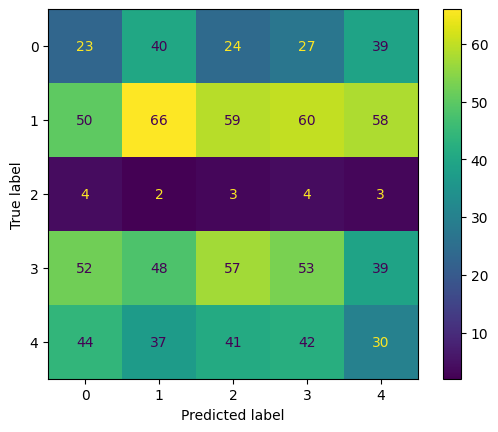

In [70]:
from sklearn.dummy import DummyClassifier
trivial_clf = DummyClassifier(strategy="uniform")
trivial_clf.fit(df_train_new.drop(columns=['category']), y_train)

y_trivial = trivial_clf.predict(df_test_new.drop(columns=['category']))
print(classification_report(y_test, y_trivial,target_names = Categories))

cm= ConfusionMatrixDisplay.from_estimator(trivial_clf, df_test_new.drop(columns=['category']), y_test)



# Identify Text Clarity

In [71]:
data.head(10)

,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity,clean_text,text_length
0,428209002237,Ramsay was born in Glasgow on 2 October 1852. ...,ORG_YES_PRODUCT_NO_PERSON_YES_,49.0,12.0,man,biographies,clear_enough,ramsay was born in glasgow on 2 october 1852. ...,283
1,564218010072,It has been widely estimated for at least the ...,ORG_YES_PRODUCT_NO_PERSON_NO_,166.0,47.0,man,artificial intelligence,not_clear_enough,it has been widely estimated for at least the ...,1037
2,291401001672,He went on to win the Royal Medal of the Royal...,ORG_YES_PRODUCT_NO_PERSON_NO_,69.0,18.0,non-binary,biographies,clear_enough,he went on to win the royal medal of the royal...,423
3,31548004883,The changes have altered many underlying assum...,ORG_NO_PRODUCT_YES_PERSON_NO_,76.0,27.0,non-binary,programming,clear_enough,the changes have altered many underlying assum...,514
4,50634005146,"After these novels were published, Disraeli de...",ORG_YES_PRODUCT_YES_PERSON_YES_,200.0,47.0,man,biographies,not_clear_enough,"after these novels were published, disraeli de...",1235
5,220520007895,Philo also proposes that the order in nature m...,ORG_NO_PRODUCT_NO_PERSON_NO_,137.0,36.0,man,philosophy,clear_enough,philo also proposes that the order in nature m...,798
6,6360003753,"This led to the AI spring of the early 2020s,...",ORG_YES_PRODUCT_NO_PERSON_NO_,116.0,47.0,man,artificial intelligence,not_clear_enough,"this led to the ai spring of the early 2020s, ...",886
7,848119011941,A second form of functionalism is based on the...,ORG_YES_PRODUCT_NO_PERSON_YES_,42.0,14.0,man,philosophy,clear_enough,a second form of functionalism is based on the...,277
8,49279000639,"The opposite of ""moral"" is ""immoral"", meaning ...",ORG_NO_PRODUCT_NO_PERSON_NO_,51.0,8.0,man,philosophy,clear_enough,"the opposite of ""moral"" is ""immoral"", meaning ...",275
9,79225005859,Pepys' diary provides a first-hand account of ...,ORG_NO_PRODUCT_YES_PERSON_YES_,139.0,31.0,man,biographies,not_clear_enough,pepys' diary provides a first-hand account of ...,856


#### Making a prototype with 100 data points

In [72]:
data_2=data.head(100)

In [73]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   par_id              100 non-null    int64  
 1   paragraph           100 non-null    object 
 2   has_entity          100 non-null    object 
 3   lexicon_count       100 non-null    float64
 4   difficult_words     100 non-null    float64
 5   last_editor_gender  100 non-null    object 
 6   category            100 non-null    object 
 7   text_clarity        100 non-null    object 
 8   clean_text          100 non-null    object 
 9   text_length         100 non-null    int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 7.9+ KB


**Lavelling the text_clerity column**

In [74]:
data_2.loc[data_2['text_length'] > 800, 'text_clarity'] = 'not_clear_enough'
data_2.loc[data_2['text_length'] <= 800, 'text_clarity'] = 'clear_enough'

In [75]:
data_2.head()

,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity,clean_text,text_length
0,428209002237,Ramsay was born in Glasgow on 2 October 1852. ...,ORG_YES_PRODUCT_NO_PERSON_YES_,49.0,12.0,man,biographies,clear_enough,ramsay was born in glasgow on 2 october 1852. ...,283
1,564218010072,It has been widely estimated for at least the ...,ORG_YES_PRODUCT_NO_PERSON_NO_,166.0,47.0,man,artificial intelligence,not_clear_enough,it has been widely estimated for at least the ...,1037
2,291401001672,He went on to win the Royal Medal of the Royal...,ORG_YES_PRODUCT_NO_PERSON_NO_,69.0,18.0,non-binary,biographies,clear_enough,he went on to win the royal medal of the royal...,423
3,31548004883,The changes have altered many underlying assum...,ORG_NO_PRODUCT_YES_PERSON_NO_,76.0,27.0,non-binary,programming,clear_enough,the changes have altered many underlying assum...,514
4,50634005146,"After these novels were published, Disraeli de...",ORG_YES_PRODUCT_YES_PERSON_YES_,200.0,47.0,man,biographies,not_clear_enough,"after these novels were published, disraeli de...",1235


In [76]:
data_2['text_clarity'].value_counts()

text_clarity
clear_enough        79
not_clear_enough    21
Name: count, dtype: int64

In [77]:
print('Text Categories names are:')
Text_Categories =['clear_enough','not_clear_enough']

print(Text_Categories)
print()
print('Text Categories names and corresponding labels are:')
print([(v, k) for k, v in enumerate(Text_Categories)])


Text Categories names are:
['clear_enough', 'not_clear_enough']

Text Categories names and corresponding labels are:
[('clear_enough', 0), ('not_clear_enough', 1)]


In [78]:
# Spliting the prototype
df2_train,df2_test=train_test_split(data_2,test_size=0.2,stratify = data_2['text_clarity'],random_state=0)

#### Encoding

In [79]:
# Encoding 'text_clarity' by LabelEncoder
df2_train[['text_clarity']] = df2_train[['text_clarity']].apply(LabelEncoder().fit_transform)
df2_test[['text_clarity']] = df2_test[['text_clarity']].apply(LabelEncoder().fit_transform)

In [80]:
t0 = tt()
df2_test_emb = df2_test['clean_text'].apply(lambda x: pd.Series(get_spacy_doc_embedding(x)))
df2_test_new = df2_test_emb.join(df2_test[['difficult_words','text_length','text_clarity']])
df2_test_new.columns = df2_test_new.columns.astype(str)
print(f'Time elapsed is {(tt()-t0):.2f} seconds')


Time elapsed is 0.48 seconds


In [81]:
t0 = tt()
df2_train_emb = df2_train['clean_text'].apply(lambda x: pd.Series(get_spacy_doc_embedding(x)))
df2_train_new = df2_train_emb.join(df2_train[['difficult_words','text_length','text_clarity']])
df2_train_new.columns = df2_train_new.columns.astype(str)
print(f'Time elapsed is {(tt()-t0):.2f} seconds')


Time elapsed is 2.02 seconds


In [82]:
# Preparation
import warnings
warnings.simplefilter("ignore")

y2_train = df2_train_new['text_clarity']
y2_test = df2_test_new['text_clarity']

**Model buliding for prototype**

In [83]:


clf_search = GridSearchCV(clf_, hparameters, scoring= "accuracy", cv= 5,
                          return_train_score=True)

t0 = tt()
_ =clf_search.fit(df2_train_new.drop(columns = ['text_clarity']), y2_train)
print(f'Time taken to train gridsearch: {tt()-t0:.2f} seconds.')



Time taken to train gridsearch: 6.90 seconds.


**CV search for prototype**

In [84]:
#original data
print(clf_search.best_score_, clf_search.best_params_)

print()


0.925 {'clf__hidden_layer_sizes': (30,), 'clf__learning_rate_init': 0.001}



**Evaluation**

In [85]:
cv_res = pd.DataFrame(clf_search.cv_results_)
interesting_columns = ['mean_test_score','std_test_score','mean_train_score','std_train_score']
interesting_columns = interesting_columns + [t for t in cv_res.columns if 'param_' in t]
cv_res[interesting_columns]

,mean_test_score,std_test_score,mean_train_score,std_train_score,param_clf__hidden_layer_sizes,param_clf__learning_rate_init
0,0.8000,0.025000,0.781250,0.026146,"(20, 20)",0.0001
1,0.9125,0.063738,0.978125,0.023385,"(20, 20)",0.001
2,0.7875,0.140312,0.828125,0.086150,"(30,)",0.0001
3,0.9250,0.046771,0.968750,0.013975,"(30,)",0.001


Here the results of training dataset and validation dataset are almost same. So there is no over/under-fitting problem.

In [86]:
# Get the best estimator for further analysis of the results using the test set
best_clf = clf_search.best_estimator_

                  precision    recall  f1-score   support

    clear_enough       0.94      1.00      0.97        16
not_clear_enough       1.00      0.75      0.86         4

        accuracy                           0.95        20
       macro avg       0.97      0.88      0.91        20
    weighted avg       0.95      0.95      0.95        20



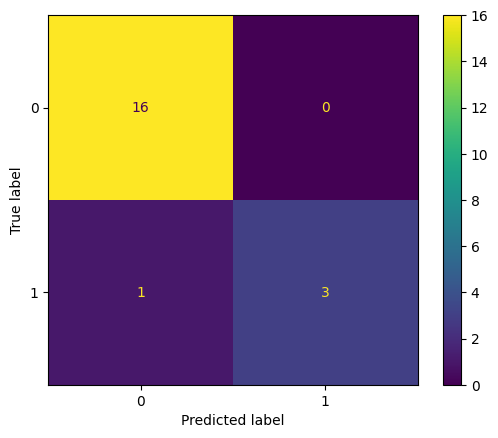

In [87]:
# Compute predictions and evaluation metrics using the best estimator
y2_pred = best_clf.predict(df2_test_new.drop(columns = ['text_clarity']))
print(classification_report(y2_test, y2_pred,target_names=Text_Categories))

cm= ConfusionMatrixDisplay.from_estimator(best_clf, df2_test_new.drop(columns = ['text_clarity']), y2_test)



                  precision    recall  f1-score   support

    clear_enough       0.80      0.50      0.62        16
not_clear_enough       0.20      0.50      0.29         4

        accuracy                           0.50        20
       macro avg       0.50      0.50      0.45        20
    weighted avg       0.68      0.50      0.55        20



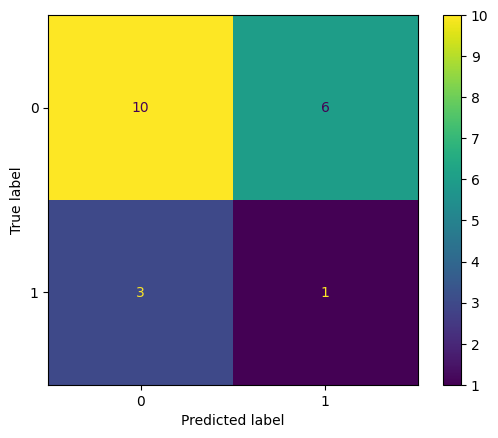

In [88]:
from sklearn.dummy import DummyClassifier
trivial_clf = DummyClassifier(strategy="uniform")
trivial_clf.fit(df2_train_new.drop(columns=['text_clarity']), y2_train)

y_trivial = trivial_clf.predict(df2_test_new.drop(columns=['text_clarity']))
print(classification_report(y2_test, y_trivial,target_names=Text_Categories))

cm= ConfusionMatrixDisplay.from_estimator(trivial_clf, df2_test_new.drop(columns=['text_clarity']), y2_test)
